Oktober 2020
<img width=300 src="./fig/ladisk.png">

<center>Prof. dr. Janko Slavič</center>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Discrete Fourier integral transform

Theory (Fourier transform - Fourier integral):

$
x(t)=\int_{-\infty}^{\infty}
X(f)\,e^{j\,2\,\pi\,f\,t}\,df
$


$
X(f)=\int_{-\infty}^{\infty}
x(t)\,e^{-j\,2\,\pi\,f\,t}\,dt
$ (Amplitudna gostota $X(f)=\lim_{\Delta f\rightarrow 0}\frac{c_n}{\Delta f}$)

In [76]:
def Xf(x, t, f, predznak=-1):
    dt = t[1] - t[0]
    return np.trapz(x*np.exp(predznak*1j*2*np.pi*f*t),dx=dt)

def X(x, t, f):
    return np.asarray([Xf(x, t, _f) for _f in f])

def xr(X, t, f):
    return np.asarray([Xf(X, f, _t, 1) for _t in t])#pazi minus pri f

Harmonic function

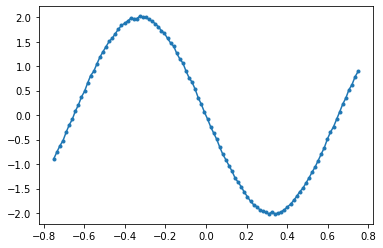

In [147]:
T = 1.5
N = 100
f = 0.767
t1 = np.linspace(-T/2, T/2, N) # ! attention: last index is included !!
dt = t1[1] - t1[0]
x1 = 2*np.cos(2*np.pi*f*t1+0.5*np.pi)
x1=x1+0.05*(np.random.rand(N)-0.5)
plt.plot(t1, x1,'.-');

Time

In [148]:
[t1[0], t1[-1], dt, len(t1)]

[-0.75, 0.75, 0.015151515151515138, 100]

In [149]:
[x1[0], x1[-1]]

[-0.8917575780838795, 0.8928759839500121]

Discrete FT

In [150]:
df = 1/T
fmax = df*(N)/2
f1 = np.linspace(-fmax, fmax, N+1)
X1 = X(x1,t1,f1)

(-3.0, 3.0)

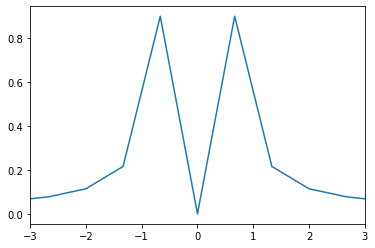

In [151]:
plt.plot(f1,np.abs(X1)/T);
plt.xlim(-3,3)

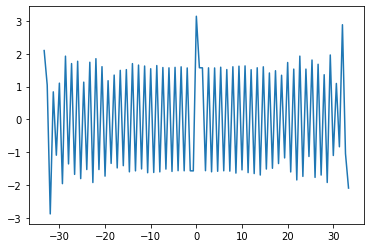

In [152]:
plt.plot(f1, np.angle(X1));

In [153]:
sel = np.abs((f1-f))<1
np.arange(len(sel))[sel]

array([50, 51, 52])

In [154]:
2/T*np.abs(X1[sel])

array([0.0023913 , 1.79550263, 0.43229303])

In [155]:
np.angle(X1[sel], deg=True)

array([180.        ,  90.05898575,  89.89380444])

# Fast FT

Theory (Fourier transform - Fourier integral):

$
x(t)=\int_{-\infty}^{\infty}
X(f)\,e^{j\,2\,\pi\,f\,t}\,df
$


$
X(f)=\int_{-\infty}^{\infty}
x(t)\,e^{-j\,2\,\pi\,f\,t}\,dt
$ (Amplitudna gostota $X(f)=\lim_{\Delta f\rightarrow 0}\frac{c_n}{\Delta f}$)

Definition in your program!

$X_k=\sum_{m=0}^{n-1}\,x_m\,e^{-j\,2\,\pi\,m\,k/n}$    where: $k=0,1,2,\dots,n-1$

$x_m=\frac{1}{n}\,\sum_{k=0}^{n-1}\,X_k\,e^{j\,2\,\pi\,m\,k/n}$    where: $m=0,1,2,\dots,n-1$

Note: 

1. $k$ goes up to $n-1$ ! Therefore: $T= n\,dt$

2. time starts at 0s when $k=0$!!

In [158]:
#?np.fft

In [214]:
t2 = t1[:-1]
x2 = x1[:-1]

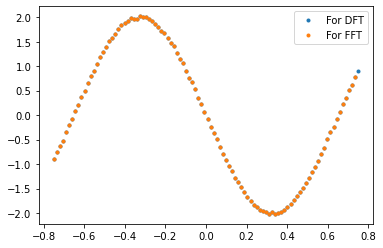

In [215]:
plt.plot(t1,x1, '.', label='For DFT')
plt.plot(t2,x2, '.', label='For FFT')
plt.legend();

Time domain

In [216]:
[t2[0], t2[-1], dt, len(t2)]

[-0.75, 0.7348484848484849, 0.015151515151515138, 99]

In [217]:
[x2[0], x2[-1]]

[-0.8917575780838795, 0.7849153152998275]

In [218]:
X2 = np.fft.fft(x2)
f2 = np.fft.fftfreq(len(x2), dt)

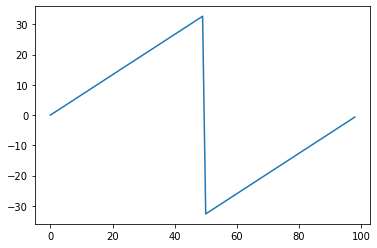

In [219]:
plt.plot(f2)

In [220]:
f2[:3]

array([0.        , 0.66666667, 1.33333333])

In [221]:
f2[-3:]

array([-2.        , -1.33333333, -0.66666667])

In [222]:
len(X2)

99

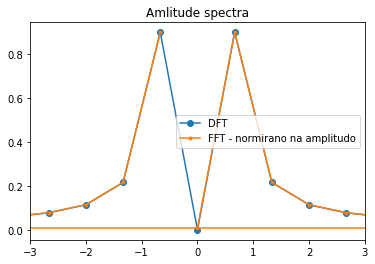

In [223]:
plt.title('Amlitude spectra')
plt.plot(f1, np.abs(X1/T), 'o-', label='DFT')       # pay attenttion to the normalization
plt.plot(f2, np.abs(X2/len(X2)), '.-', label='FFT - normirano na amplitudo')
#plt.plot(f2, np.abs(X2/np.sqrt(len(X2))), '.-', label='FFT - normirano na moč')
plt.xlim(-3, 3)
#plt.ylim(-.1, 1)
plt.legend();

In [226]:
#plt.plot(np.fft.fftshift(f2), np.abs(np.fft.fftshift(X2)))

In [227]:
np.argwhere(np.abs(f1-f)<1e-0)

array([[50],
       [51],
       [52]], dtype=int64)

In [228]:
np.abs(X1[49:52])/T

array([0.89775131, 0.00119565, 0.89775131])

In [229]:
np.argwhere(np.abs(f2-f)<1e-0)

array([[0],
       [1],
       [2]], dtype=int64)

In [230]:
np.abs(X2[:3])/len(X2)

array([0.01020895, 0.89778728, 0.21631767])

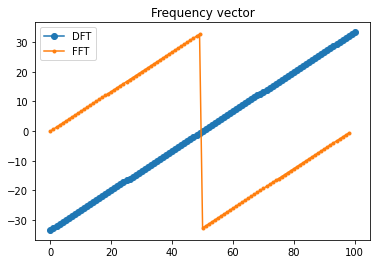

In [231]:
plt.title('Frequency vector')
plt.plot(f1,'o-', label='DFT');
plt.plot(f2,'.-', label='FFT');
plt.legend();

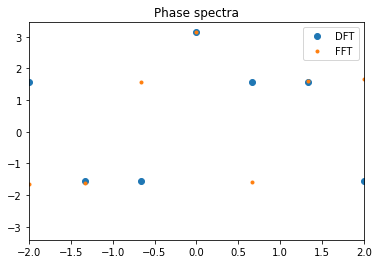

In [232]:
plt.title('Phase spectra')
plt.plot(f1, np.angle(X1),'o', label='DFT')
plt.plot(f2, np.angle(X2), '.', label='FFT')
plt.xlim(-2, 2)
plt.legend();

Why there is no matching between the phases ? (Answer is at the end of the document)

In [233]:
X2[:3]

array([-1.01068624 +0.j        , -0.80081792-88.87733295j,
       -0.85265548+21.39846831j])

In [234]:
np.angle(X1[f1==f])

array([], dtype=float64)

In [235]:
np.angle(X2[f2==f])

array([], dtype=float64)

Speed comparison

In [236]:
%timeit X(x1,t1,f1)

4.49 ms ± 279 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [237]:
%timeit -n1000 np.fft.fft(x2)

15.7 µs ± 4.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Convolution

Impulse excitation of a linear system with one DoF

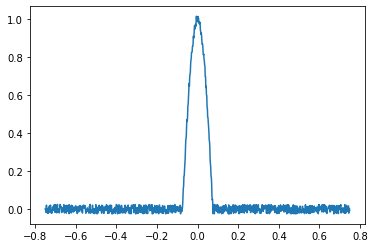

In [239]:
T = 1.5
N = 1000
w = 0.1
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]
x = np.cos(2*np.pi*t/(2*w*T))
x[np.logical_or(-w*T*0.5>t, t>w*T*0.5)] = 0.
x = x + 0.05*(np.random.rand(N)-0.5)
plt.plot(t,x);

Impulse response function (damped): $h(t)=\frac{1}{\omega_{0d}}\,e^{-\delta\,\omega_0\,t}\,\sin(\omega_{0d}\,t)$

In [240]:
delta = 0.1 # damping ratio
omega0 = 2*np.pi*10
omega0d = omega0*np.sqrt(1-delta*delta)
th = dt*np.arange(len(x))
h = np.exp(-delta*omega0*th)*np.sin(omega0d*th)/omega0d

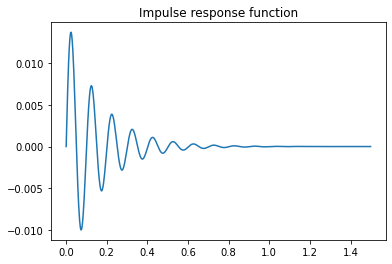

In [241]:
plt.title('Impulse response function')
plt.plot(th,h);

Convolution: $\int_{-\infty}^{\infty}h(\tau)\,x(t-\tau)\,d\tau$

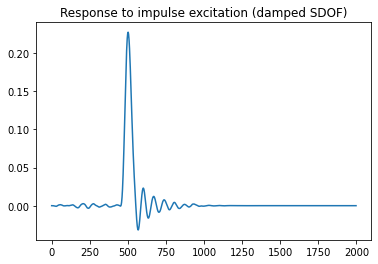

In [242]:
hx = np.convolve(h, x) # mode='full' -> sum of both arrays
plt.title('Response to impulse excitation (damped SDOF)')
plt.plot(hx);

In [243]:
hx = hx[:len(x)] # truncation of the part we are not interested in

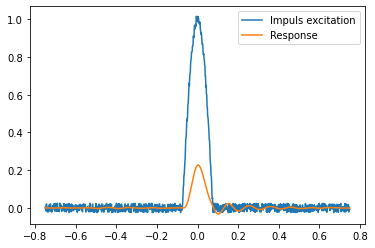

In [246]:
plt.plot(t, x, label='Impuls excitation')
#plt.plot(t, 50*h, label='IRF')
plt.plot(t, hx, label='Response')
plt.legend();

Go to frequency domain

In [247]:
HX = np.fft.fft(hx)
H = np.fft.fft(h)
X2 = np.fft.fft(x)
f = np.fft.fftfreq(len(hx),dt)


# Fourier transform of convolution

$F\{h(t)\ast x(t)\}=H(f)\,X(f)$

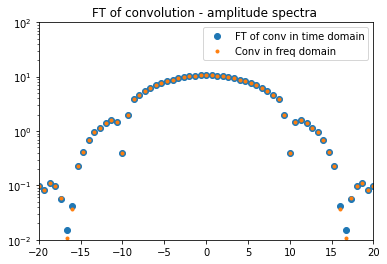

In [249]:
plt.title('FT of convolution - amplitude spectra ')
plt.semilogy(f, np.abs(HX) , 'o', label='FT of conv in time domain')
plt.semilogy(f, np.abs(H*X2) ,'.', label='Conv in freq domain')
plt.xlim(-20,20)
plt.ylim(1e-2,1e2)
plt.legend();

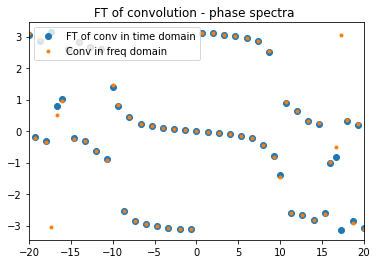

In [250]:
plt.title('FT of convolution - phase spectra ')
plt.plot(f, np.angle(HX) , 'o', label='FT of conv in time domain')
plt.plot(f, np.angle(H*X2) ,'.', label='Conv in freq domain')
plt.xlim(-20,20)
plt.legend();

c:\users\slavic\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\slavic\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


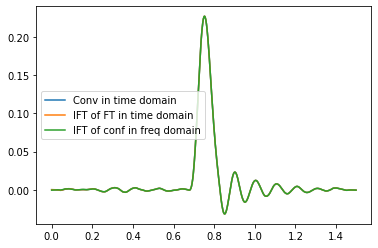

In [251]:
hx_r = np.fft.ifft(HX)
hx_r2 = np.fft.ifft(H*X2) # pazi dt
plt.plot(th, hx, label='Conv in time domain')
plt.plot(th, hx_r, label='IFT of FT in time domain')
plt.plot(th, hx_r2, label='IFT of conf in freq domain')
plt.legend();

# Windows and FT of product in time domain

Fourier transform of product:

$F\{x(t)\,w(t)\}=X(f)\ast W(f).$

Note: $\ast$ marks convolution

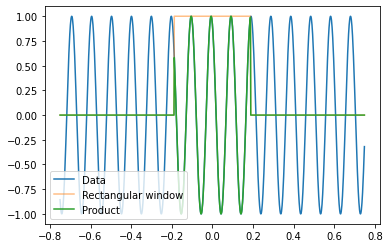

In [273]:
T = 1.5
N = 1000
omega = 10.2*2*np.pi
dt = T/(N)
t = dt*np.arange(N)-T/2
x = np.cos(omega*t+np.random.rand())#+0.5*np.random.rand(N)
#okno
w = np.ones_like(x)
w[np.abs(t) > T/8] = 0
w = w#+(np.random.rand(N)-0.5)*1e-1#šum dodan zaradi frek prostora
#w = np.hanning(len(x))
plt.plot(t,x, label='Data')
plt.plot(t,w, label='Rectangular window', alpha=0.5)
xw = x*w
plt.plot(t, xw, label='Product', alpha=1.);
plt.legend();

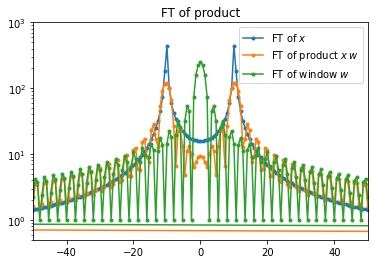

In [278]:
X = np.fft.fft(x)
XW = np.fft.fft(xw)
W = np.fft.fft(w)
f = np.fft.fftfreq(len(xw),dt)
plt.title('FT of product')
plt.semilogy(f,np.abs(X),'.-', label='FT of $x$')
plt.semilogy(f,np.abs(XW),'.-', label='FT of product $x\,w$')
plt.semilogy(f,np.abs(W),'.-', label='FT of window $w$')
plt.xlim(-50,50)
plt.ylim(0.5e-0,1e3)
plt.legend();

In [279]:
np.abs(W[:10])

array([251.        , 225.78544534, 159.15284869,  74.31703144,
         1.        ,  45.71922013,  53.04536436,  31.44186384,
         1.        ,  25.70922866])

In [280]:
np.abs(f[:10])

array([0.        , 0.66666667, 1.33333333, 2.        , 2.66666667,
       3.33333333, 4.        , 4.66666667, 5.33333333, 6.        ])

## Different windows

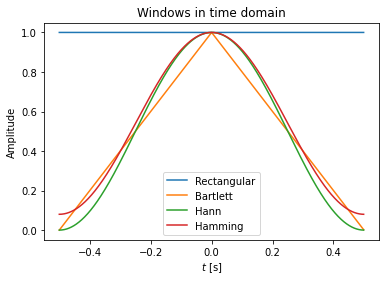

In [281]:
A = 1
T = 1.
N = 1000
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]

# Rectangular
wp = np.ones_like(t)
#Tp = 0.5*T/2 # note: to match the teoretical FT below,  here 1*T/2 should be used
Tp = 1*T/2 # note: teoretically here 1*T/2 would be used (wrongly)
wp[np.abs(t)>Tp] = 0
wp = A*wp+(np.random.rand(N)-0.5)/10000 # noise due to reasons in freq domain
Wp = np.fft.fft(wp)
f = np.fft.fftfreq(len(wp), dt)
fT_teor = np.arange(-10,10,0.01)
Wp_teor = A*T / (np.pi*fT_teor) * np.sin(np.pi*fT_teor)

#Bartlett
wBartlett = np.ones_like(t)
wBartlett = A*(wBartlett-np.abs(t)/(T/2))
WBartlett = np.fft.fft(wBartlett)
WBartlett_teor = 0.5*A*T * np.power(np.sin(0.5*np.pi*fT_teor) / (0.5*np.pi*fT_teor),2)

#Hann
wHann = A*np.power(np.cos(np.pi*t/T), 2)
WHann = np.fft.fft(wHann)
WHann_teor = 0.5*A*T * np.sin(np.pi*fT_teor) / (np.pi*fT_teor*(1-fT_teor**2))

#Hamming
wHamming = 0.54+0.46*np.cos(2*np.pi*t/T)
WHamming = np.fft.fft(wHamming)
WHamming_teor = (0.54*np.pi**2-0.08*(np.pi*fT_teor)**2)*np.sin(np.pi*fT_teor)/(np.pi*fT_teor*(np.pi**2-(np.pi*fT_teor)**2))

plt.title('Windows in time domain')
plt.plot(t,wp, label='Rectangular')
plt.plot(t,wBartlett, label='Bartlett')
plt.plot(t,wHann, label='Hann')
plt.plot(t,wHamming, label='Hamming')
plt.xlabel('$t$ [s]')
plt.ylabel('Amplitude')
plt.legend();

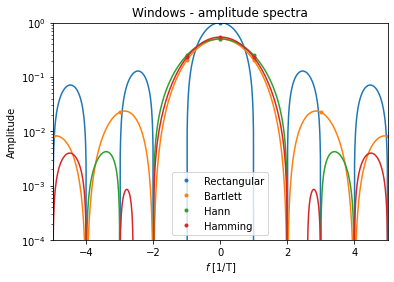

In [282]:
plt.title('Windows - amplitude spectra')
narisi = plt.plot
narisi = plt.semilogy
narisi(f*T, np.abs(Wp)/len(Wp), 'C0.', label='Rectangular')
narisi(fT_teor, Wp_teor, 'C0-')
narisi(f*T, np.abs(WBartlett)/N, 'C1.', label='Bartlett')
narisi(fT_teor, WBartlett_teor, 'C1-')
narisi(f*T, np.abs(WHann)/N, 'C2.', label='Hann')
narisi(fT_teor, WHann_teor, 'C2-')
narisi(f*T, np.abs(WHamming)/N, 'C3.', label='Hamming')
narisi(fT_teor, WHamming_teor, 'C3-')
plt.xlim(-5,5)
plt.ylim(1e-4, 1)
plt.xlabel('$f$ [1/T]')
plt.ylabel('Amplitude')
plt.legend();

# Hilbertova transformacija

Hilbertova transformacija je definirana kot:
$$h(t)\ast x(t),$$
kjer je:
$$h(t)=\frac{1}{\pi t}.$$

Teoretično se lahko določi:
$$H(\omega)=-j\,\textrm{sgn}(\omega)$$

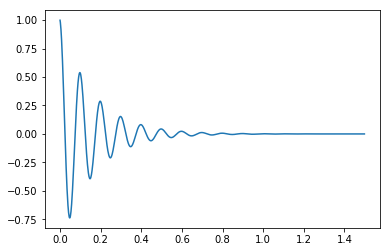

In [48]:
T = 1.5
N = 1000
omega = 10*2*np.pi
t = np.linspace(0, T, N, endpoint=False)
dt = t[1] - t[0]
x = np.cos(omega*t+np.random.rand())*np.exp(-0.1*omega*t)
plt.plot(t,x);

Impulzna prenosna funkcija pri Hilbertovi transformaciji:
$h(t)=\frac{1}{\pi\,t}$

In [49]:
th = dt*np.arange(len(x))
h = 1/(np.pi*th)
h[0] = h[1] # singularnost pri t=0! v frekvenčnem prostoru je ni

c:\Users\slavic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


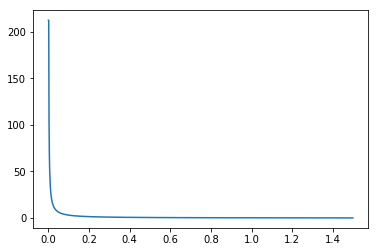

In [50]:
plt.plot(th, h);

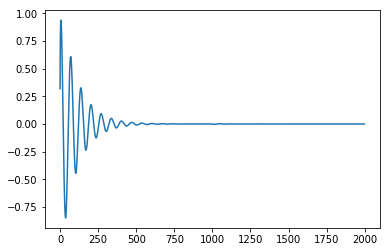

In [51]:
hx=np.convolve(h, x)*dt #pazi dt, dolžina: vsota obeh dolžin
plt.plot(hx);

In [52]:
hx = hx[:len(t)]#odrežemo dolžino po času, ki nas zanima

Analitični signal

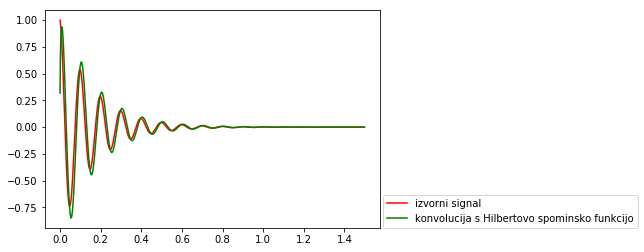

In [53]:
plt.plot(t,x,'r', label='izvorni signal');
plt.plot(t,hx,'g', label='konvolucija s Hilbertovo spominsko funkcijo');
plt.legend(loc=(1.01, 0));

In [54]:
a = x + 1j*hx

In [55]:
a[:3]

array([0.99871785+0.31790176j, 0.98023927+0.62992162j,
       0.95340044+0.77444752j])

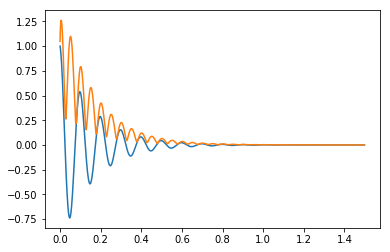

In [56]:
plt.plot(t,x);
plt.plot(t, np.abs(a));

In [57]:
H = np.fft.fft(h)#napaka zaradi singularnosti
H_teor = -1j*np.sign(f)#ni napake
f = np.fft.fftfreq(len(h), dt)
X2 = np.fft.fft(x)

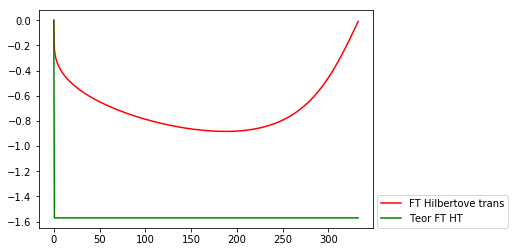

In [58]:
sel = f >= 0
plt.plot(f[sel], np.angle(H[sel]),'r', label='FT Hilbertove trans');
plt.plot(f[sel], np.angle(H_teor[sel]),'g', label='Teor FT HT');
plt.legend(loc=(1.01, 0));

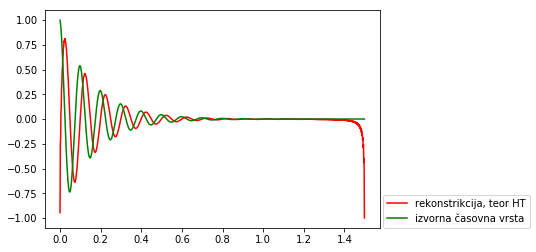

In [59]:
HX_teor = H_teor * X2
recons = np.fft.ifft(HX_teor)
plt.plot(t, recons, 'r', label='rekonstrikcija, teor HT')
plt.plot(t, x, 'g', label='izvorna časovna vrsta')
plt.legend(loc=(1.01, 0));

In [60]:
a=x+1j*recons

Prikaz ovojnice

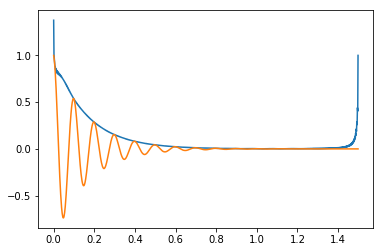

In [61]:
plt.plot(t, np.abs(a), label='ovojnica');
plt.plot(t, x);
#plt.plot(np.abs(recons));

### Odgovor

Zakaj se faze ne ujemajo?
Zato ker FFT čas začne pri času 0s, Diskretna oblika FT kakor je definirana zgoraj pa pri podanem času!